In [1]:
import pandas as pd
import yfinance as yf
from fbprophet import Prophet
import numpy as np

from src.data_loader import DataGenerator

In [2]:
aapl = DataGenerator('db').data_search('AAPL')
aapl.sort_index(inplace = True)
aapl.reset_index(inplace=True)

기존 데이터 불러오기 성공


In [30]:
size = 0.99
train = aapl.iloc[:int(len(aapl) * size)]
test = aapl.iloc[int(len(aapl) * size):]

In [31]:
train = train[['Datetime','Adj Close']]
test = test[['Datetime','Adj Close']]

train = train.rename({'Datetime': 'ds', 'Adj Close': 'y'}, axis='columns')
test = test.rename({'Datetime': 'ds', 'Adj Close': 'y'}, axis='columns')

m = Prophet(daily_seasonality = True, weekly_seasonality = True, yearly_seasonality = True)
m.fit(train)
# future = m.make_future_dataframe(periods=365)
forecast = m.predict(test)
pd.options.display.max_columns = None
print(forecast.tail(2))

/Users/junginseo/opt/anaconda3/envs/dl_env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -459.148
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       17948.9     0.0588172       5056.27           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       18583.3    0.00566401       3143.74           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       18840.3     0.0132638       2461.46           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       19077.5     0.0790909       3361.43           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       19149.2    0.00651177       567.011           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/junginseo/opt/anaconda3/envs/dl_env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/junginseo/opt/anaconda3/envs/dl_env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


           ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
74 2022-11-02  158.920146  149.223269  169.568055   158.904467   158.933740   
75 2022-11-03  158.987243  149.653423  169.609542   158.967709   159.002089   

    additive_terms  additive_terms_lower  additive_terms_upper     daily  \
74        0.144251              0.144251              0.144251 -0.153692   
75        0.081986              0.081986              0.081986 -0.153692   

    daily_lower  daily_upper    weekly  weekly_lower  weekly_upper    yearly  \
74    -0.153692    -0.153692  0.059762      0.059762      0.059762  0.238181   
75    -0.153692    -0.153692  0.007087      0.007087      0.007087  0.228591   

    yearly_lower  yearly_upper  multiplicative_terms  \
74      0.238181      0.238181                   0.0   
75      0.228591      0.228591                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper        yhat  
74                         0.0                    

In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].sort_values('ds')

,ds,yhat,yhat_lower,yhat_upper
0,2022-07-20,151.614445,141.367549,161.981025
1,2022-07-21,151.647091,141.805651,162.323835
2,2022-07-22,151.644487,142.100243,161.830773
3,2022-07-25,151.912444,141.787189,162.170359
4,2022-07-26,152.077270,141.909291,162.771297
...,...,...,...,...
71,2022-10-28,158.636039,148.334840,168.842112
72,2022-10-31,158.835000,148.548465,169.306893
73,2022-11-01,158.976302,148.583292,168.960728
74,2022-11-02,159.064397,149.223269,169.568055


In [33]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

           ds        yhat  yhat_lower  yhat_upper
71 2022-10-28  158.636039  148.334840  168.842112
72 2022-10-31  158.835000  148.548465  169.306893
73 2022-11-01  158.976302  148.583292  168.960728
74 2022-11-02  159.064397  149.223269  169.568055
75 2022-11-03  159.069229  149.653423  169.609542


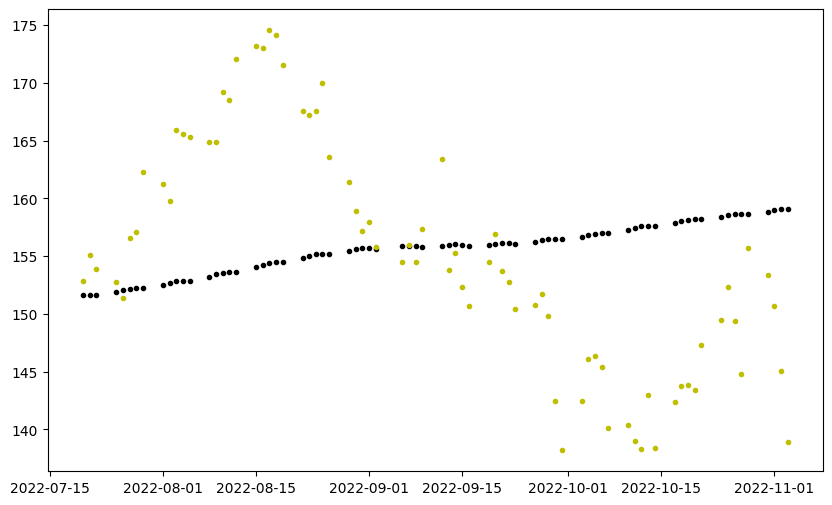

In [34]:
import matplotlib.pyplot as plt
figsize=(10, 6)
xlabel='ds'
ylabel='y'
fig = plt.figure(facecolor='w', figsize=figsize)
ax = fig.add_subplot(111)
fcst_t = forecast['ds'].dt.to_pydatetime()
ax.plot(forecast['ds'].dt.to_pydatetime(), forecast['yhat'], 'k.')
ax.plot(test['ds'].dt.to_pydatetime(), test['y'], 'y.')

In [35]:
fore_trend = [1 if forecast['yhat'].diff().iloc[i]>0 else 0 for i in range(len(forecast))]
true_trend = [1 if test['y'].diff().iloc[i]>0 else 0 for i in range(len(test))]

In [36]:
np.sum([1 if fore_trend[i] == true_trend[i] else 0 for i in range(len(true_trend))])/len(true_trend)

0.5131578947368421